In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
file_path = '/Users/gamzeadibelli/OZU DS/CS552/All_Data.xlsx'
df = pd.read_excel(file_path)

df.head()

,Name,Affiliation,Citations,Citations (Last 5 Years),h-index,h-index (Last 5 Years),i10-index,i10-index (Last 5 Years),Number of Publications,Scholar ID,Profile Link,University,City,Type,Opening Date
0,Eyup Dogan,Abdullah Gül University,14192.0,13298.0,52,51,77,75,104,NKlJ3akAAAAJ,https://scholar.google.com/citations?hl=en&use...,ABDULLAH_GÜL,KAYSERİ,DEVLET,2010.0
1,Hakan Usta,"Professor at Abdullah Gül University, Kayseri,...",6476.0,2960.0,34,27,65,59,131,1f-qx-oAAAAJ,https://scholar.google.com/citations?hl=en&use...,ABDULLAH_GÜL,KAYSERİ,DEVLET,2010.0
2,Sebiha Cevik-Kaplan,"Faculty of Life and Natural Sciences, Abdullah...",5630.0,1356.0,9,9,9,9,24,_o6sKOUAAAAJ,https://scholar.google.com/citations?hl=en&use...,ABDULLAH_GÜL,KAYSERİ,DEVLET,2010.0
3,cengiz yilmaz,Abdullah Gul University,5582.0,2381.0,32,24,49,41,102,y3B4vD0AAAAJ,https://scholar.google.com/citations?hl=en&use...,ABDULLAH_GÜL,KAYSERİ,DEVLET,2010.0
4,İhsan Sabuncuoğlu,Abdullah Gül Üniversitesi,5358.0,1406.0,36,21,58,35,122,Xg-PmeMAAAAJ,https://scholar.google.com/citations?hl=en&use...,ABDULLAH_GÜL,KAYSERİ,DEVLET,2010.0


In [8]:
def extract_title(affiliation):
    
    titles = ["Professor", "Dr.", "Assoc. Prof.", "Asst. Prof.", "Doç.", "Prof.", "Yrd. Doç.", "Docent", "Assistant Professor", "Lecturer"]
    
    match = [title for title in titles if title.lower() in affiliation.lower()]
    return match[0] if match else None

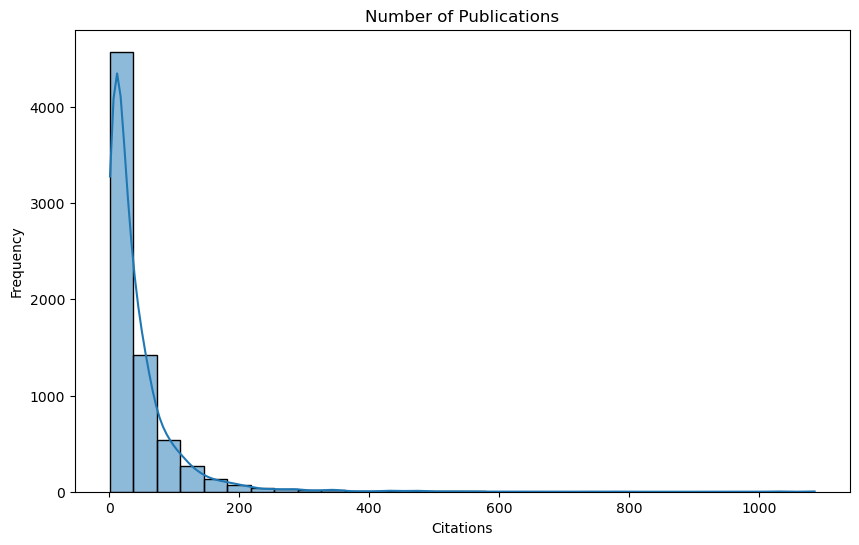

           Citations  Citations (Last 5 Years)      h-index  \
count    7138.000000               7138.000000  7138.000000   
mean      741.746988                371.710843     8.872793   
std      5266.363585               2045.906597     9.654132   
min         1.000000                  0.000000     1.000000   
25%        31.000000                 24.000000     3.000000   
50%       166.000000                109.000000     6.000000   
75%       609.000000                334.000000    12.000000   
max    288205.000000             108103.000000   237.000000   

       h-index (Last 5 Years)    i10-index  i10-index (Last 5 Years)  \
count             7138.000000  7138.000000               7138.000000   
mean                 6.869431    12.035444                  7.970300   
std                  6.605227    26.423481                 19.975723   
min                  0.000000     0.000000                  0.000000   
25%                  2.000000     1.000000                  1.000000   


In [10]:

#data cleaning

data_cleaned = df.dropna()
#data_cleaned['Opening Date'] = data_cleaned['Opening Date'].astype(int)

#Analysis
summary_statistics = data_cleaned[
    ['Citations', 'Citations (Last 5 Years)', 'h-index', 'h-index (Last 5 Years)', 
     'i10-index', 'i10-index (Last 5 Years)', 'Number of Publications']
].describe()

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Number of Publications'], bins=30, kde=True)
plt.title("Number of Publications")
plt.xlabel("Citations")
plt.ylabel("Frequency")
plt.show()

print(summary_statistics)

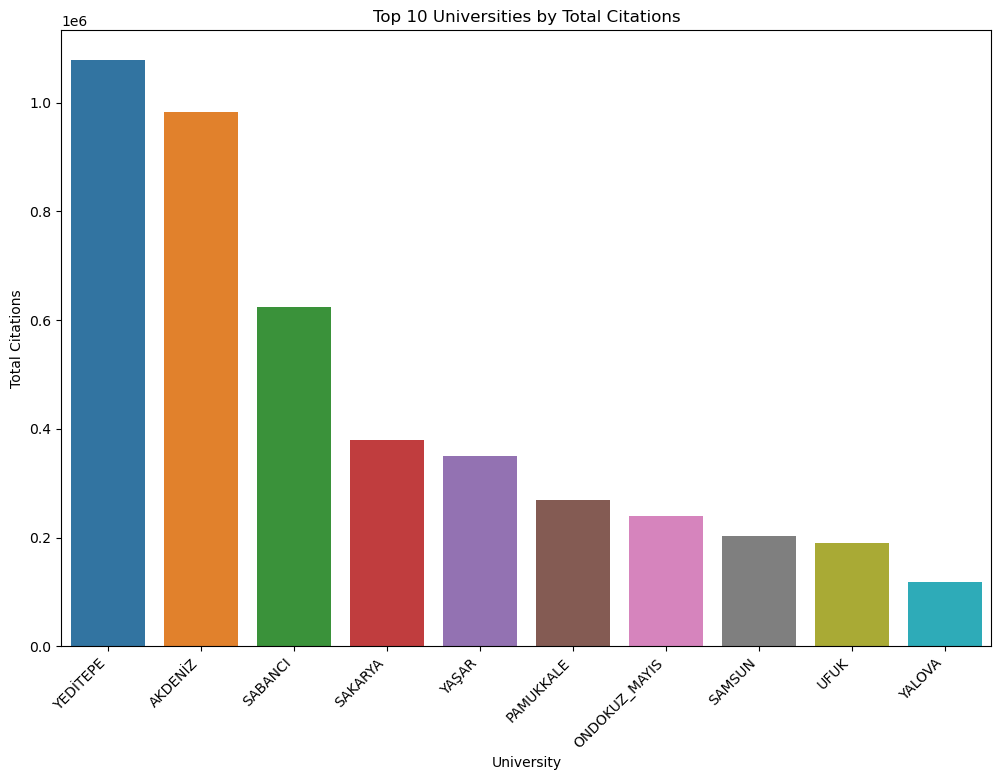

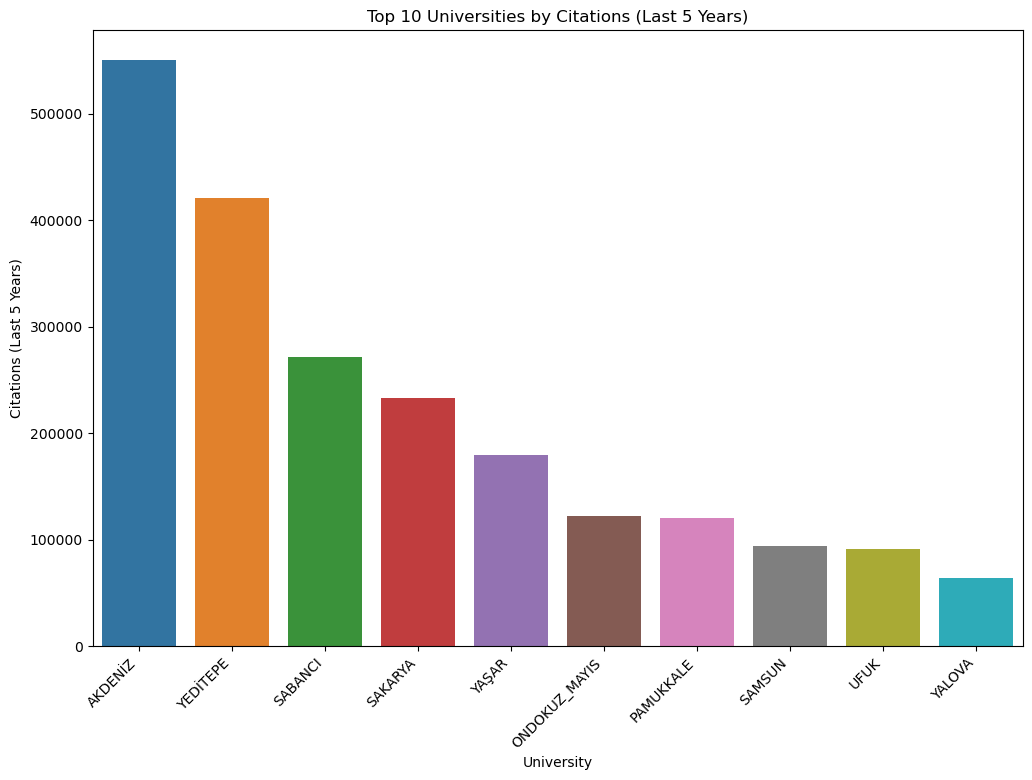

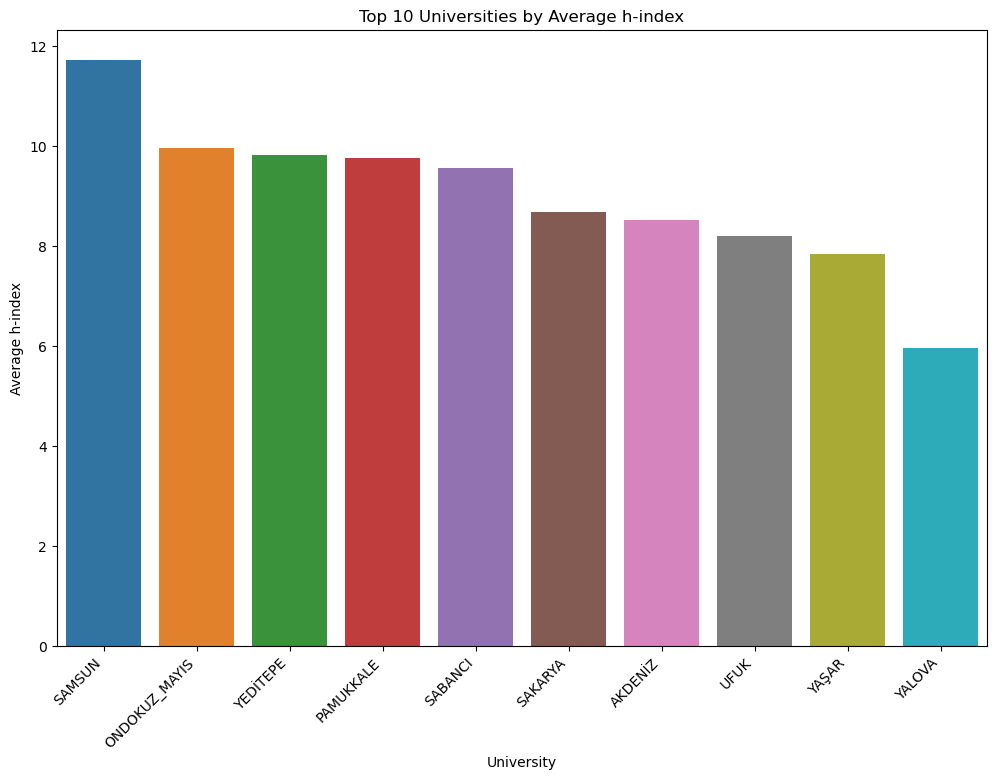

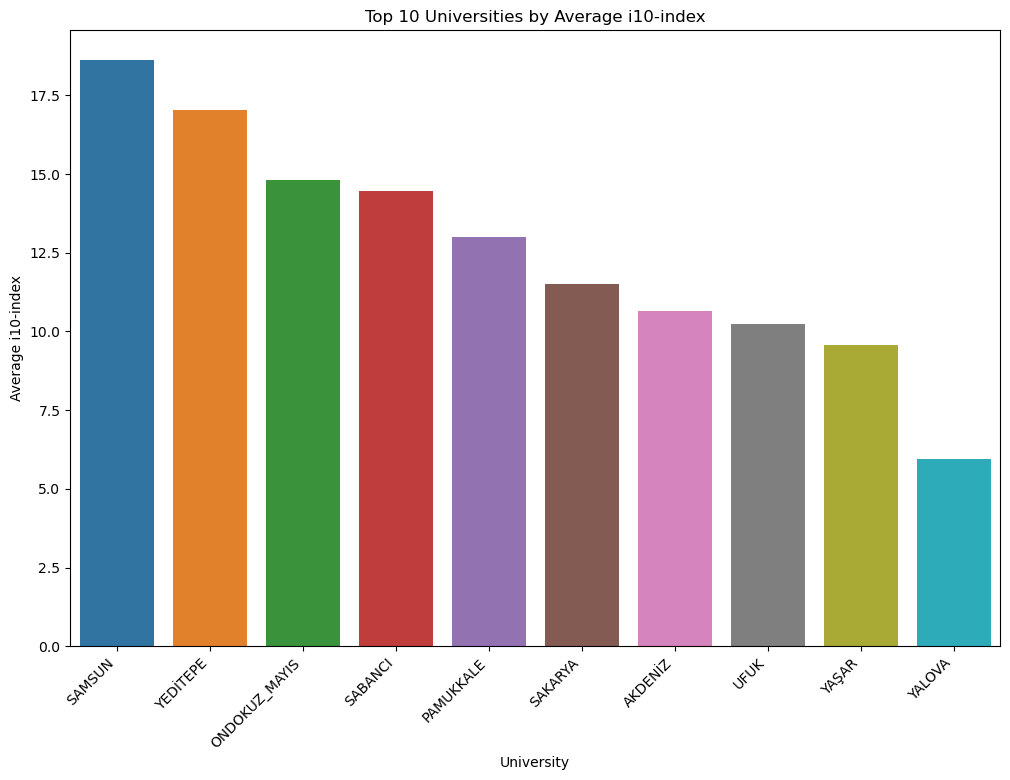

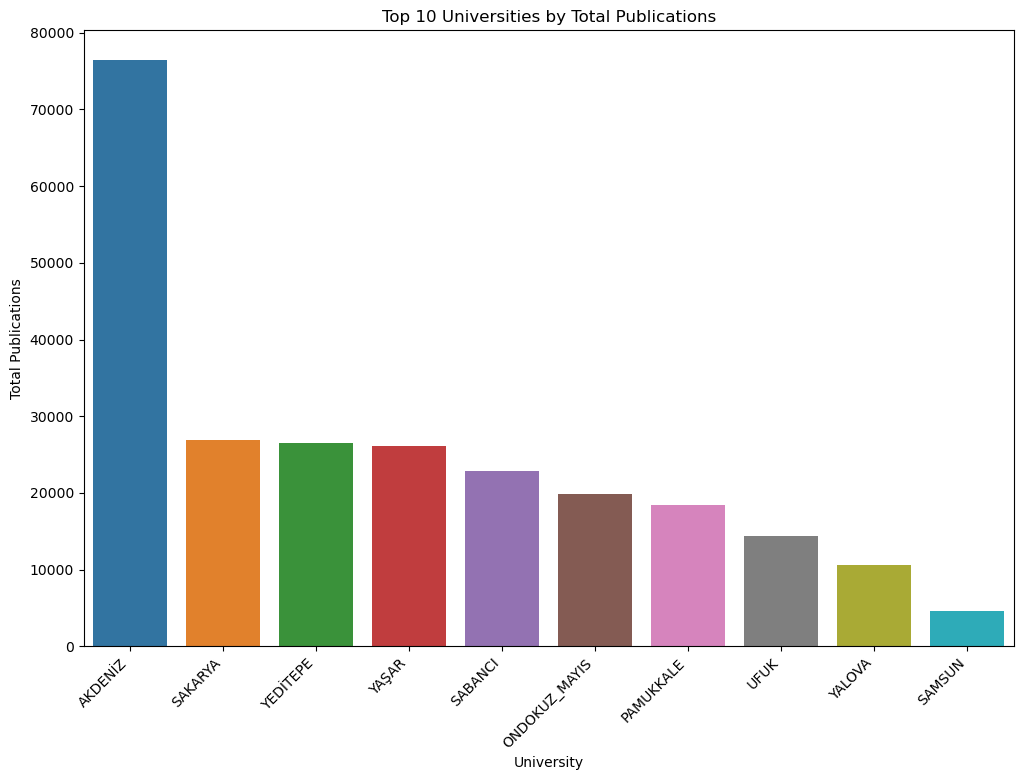

In [13]:
university_stats = data_cleaned.groupby('University').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values('Citations', ascending=False)

top_universities = university_stats.head(10)

metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Total Citations', 'Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Total Publications']

# Loop through each metric to create individual plots
for metric, title in zip(metrics, titles):
    
    sorted_data = top_universities.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_data.index, y=sorted_data[metric])
    plt.title(f"Top 10 Universities by {title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(title)
    plt.xlabel("University")
    plt.show()


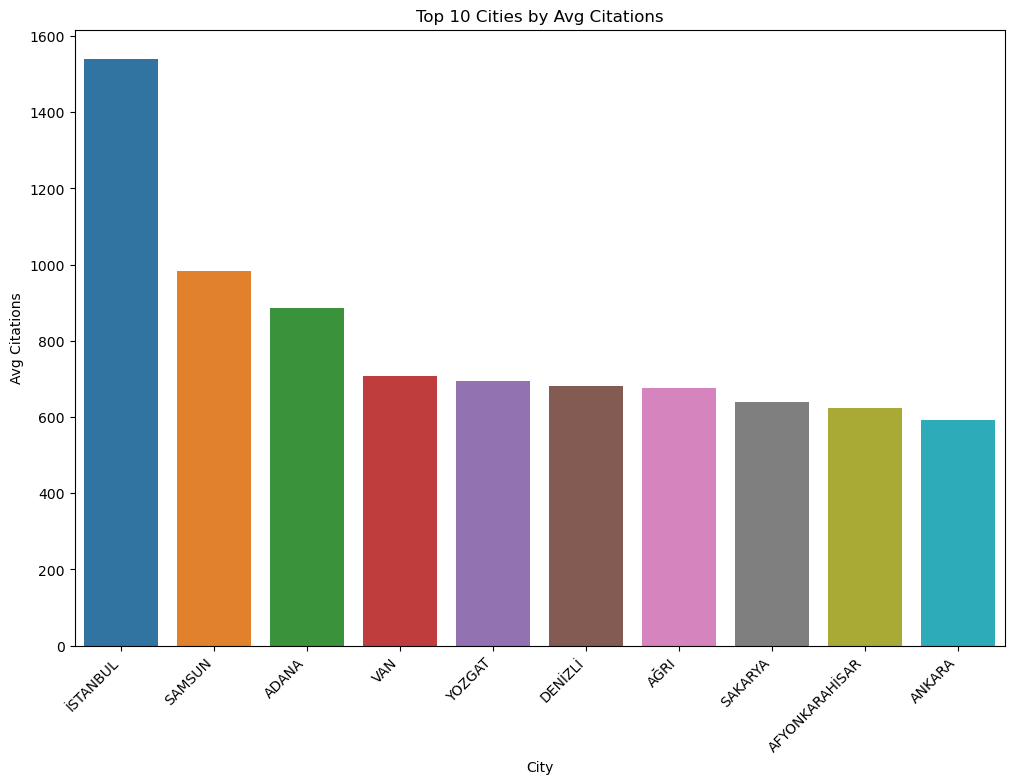

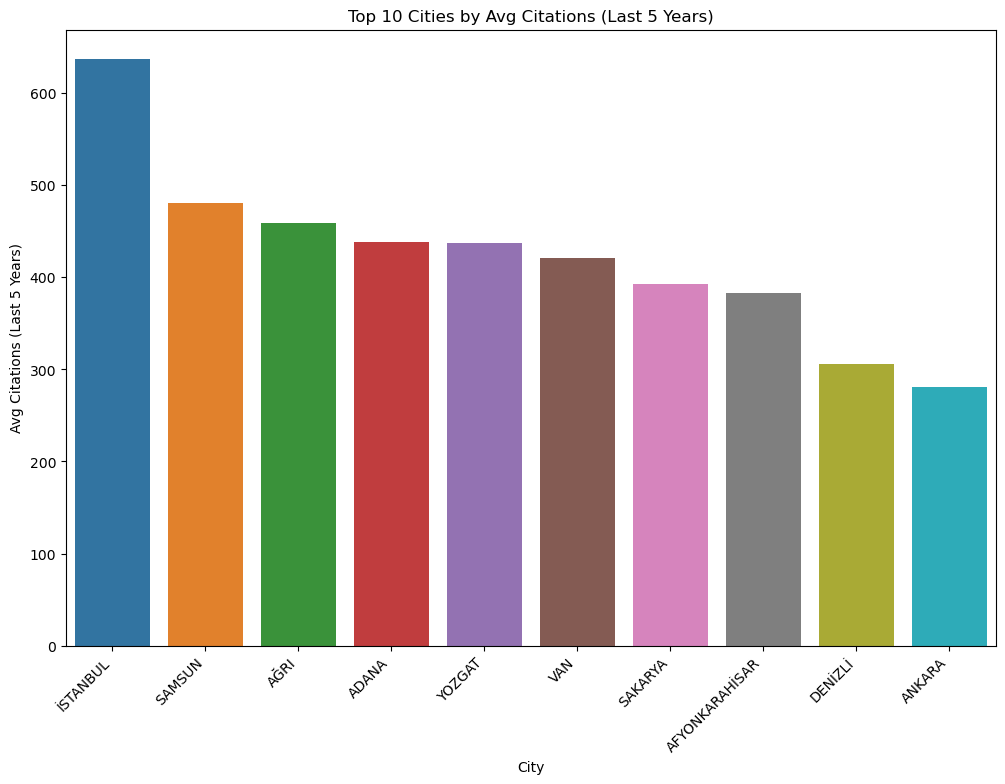

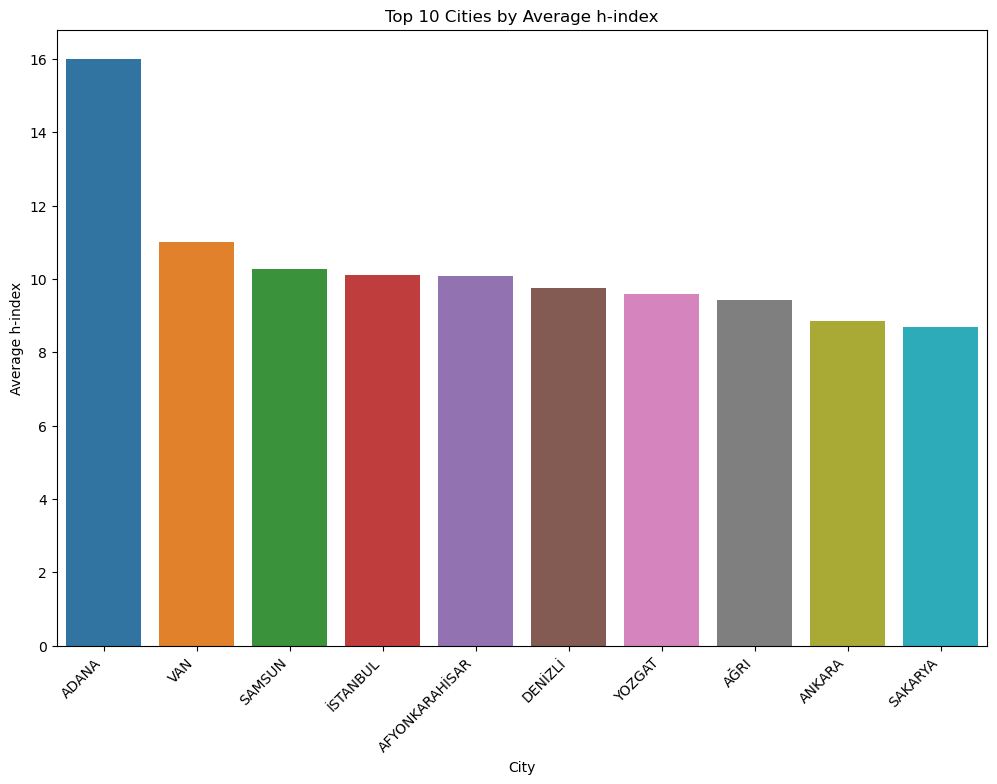

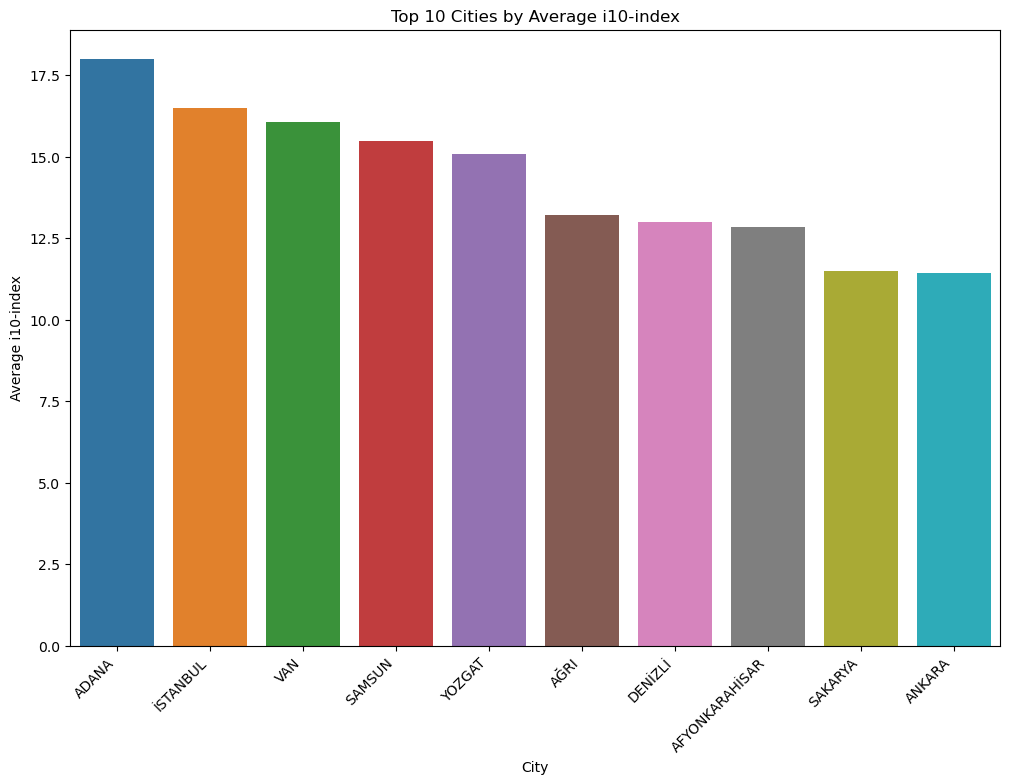

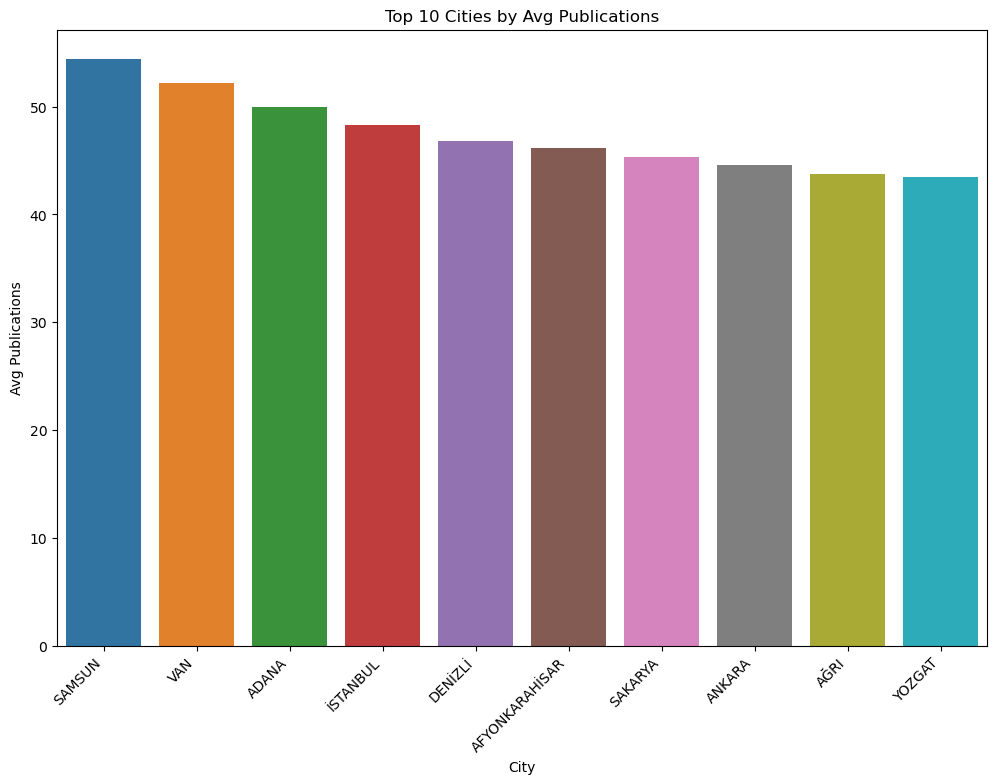

In [16]:
city_stats = data_cleaned.groupby('City').agg({
    'Citations': 'mean',
    'Citations (Last 5 Years)': 'mean',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'mean'
}).sort_values('Citations', ascending=False)

top_cities = city_stats.head(10)

metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Avg Citations', 'Avg Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Avg Publications']


for metric, title in zip(metrics, titles):
    
    sorted_data = top_cities.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_data.index, y=sorted_data[metric])
    plt.title(f"Top 10 Cities by {title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(title)
    plt.xlabel("City")
    plt.show()


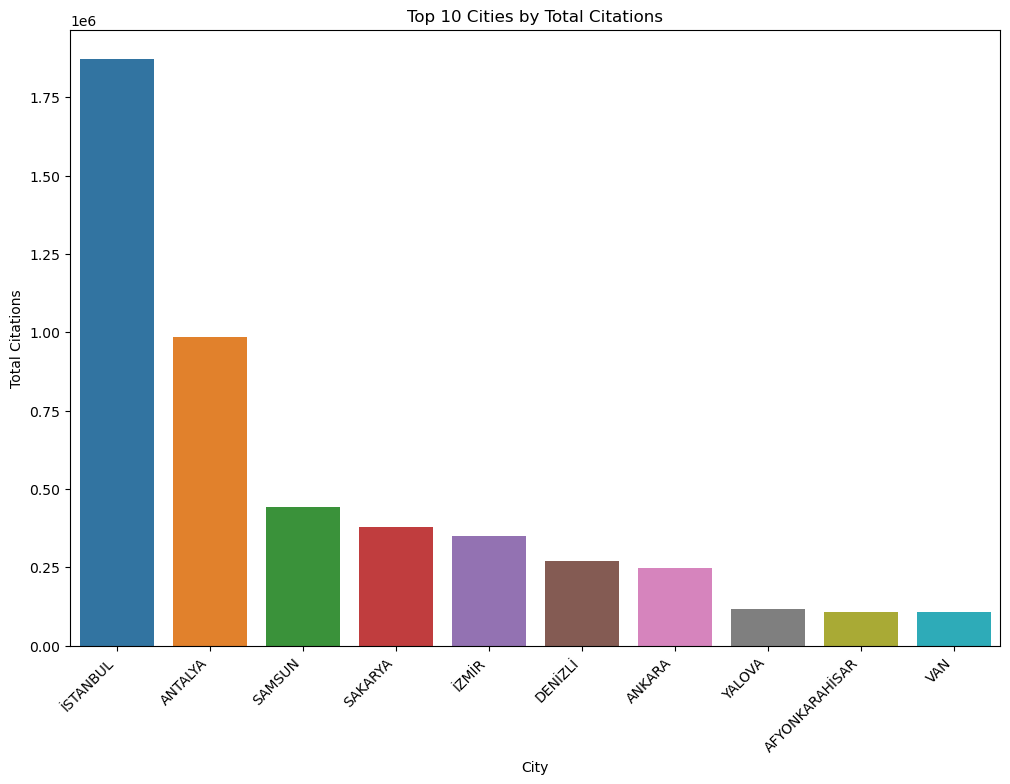

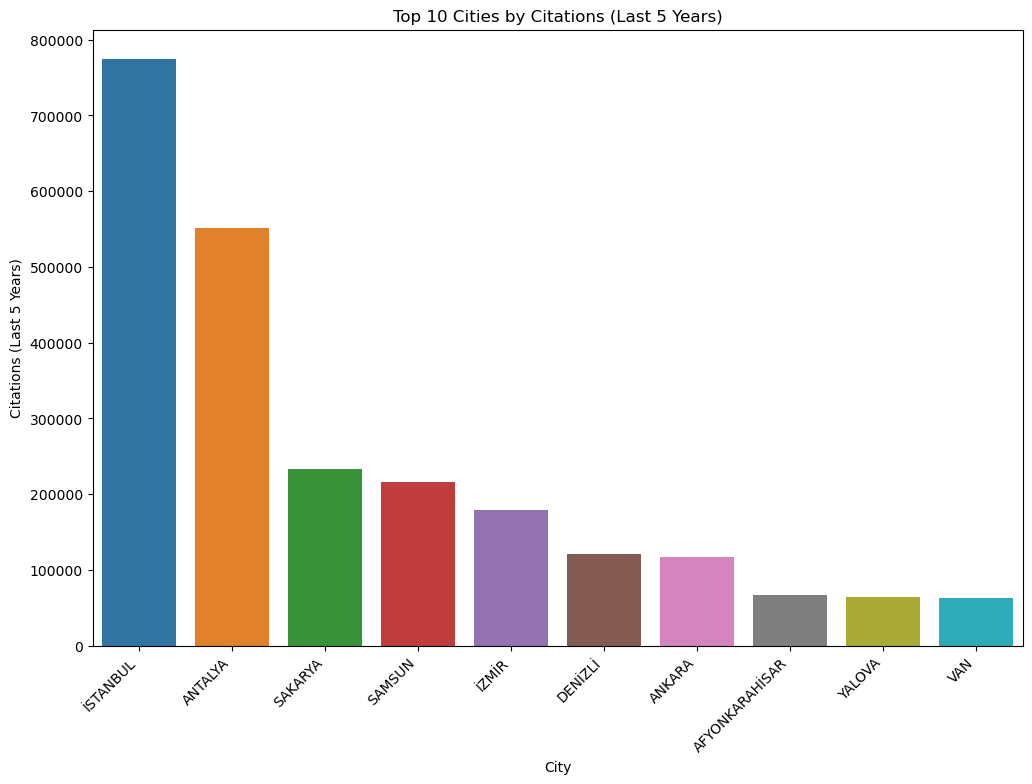

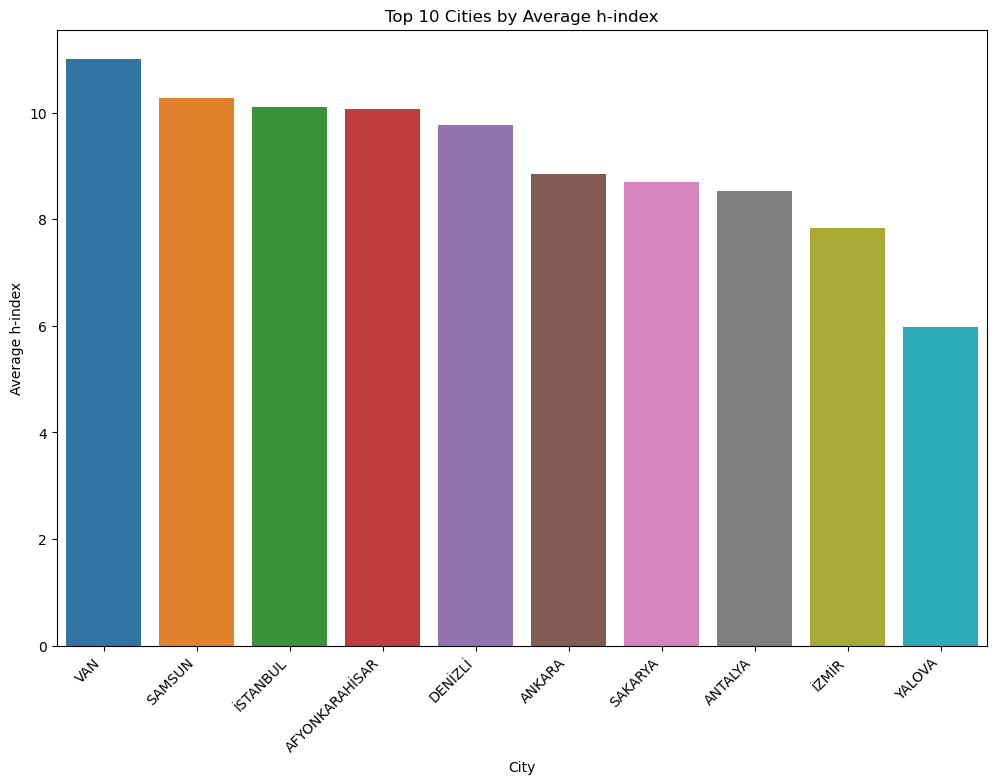

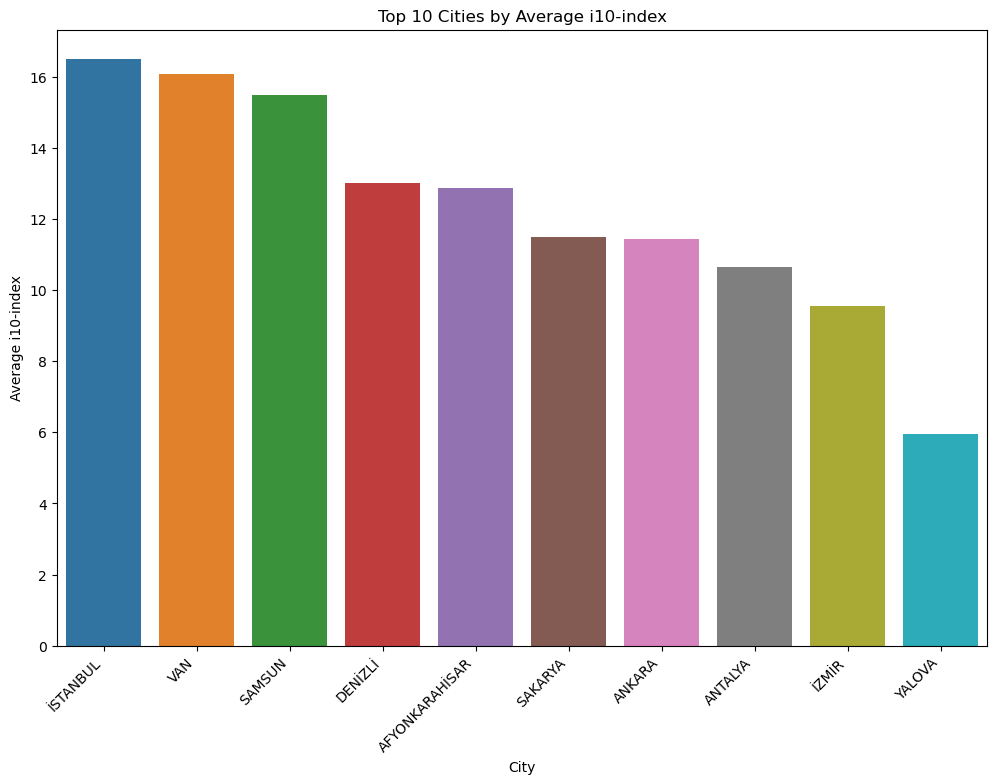

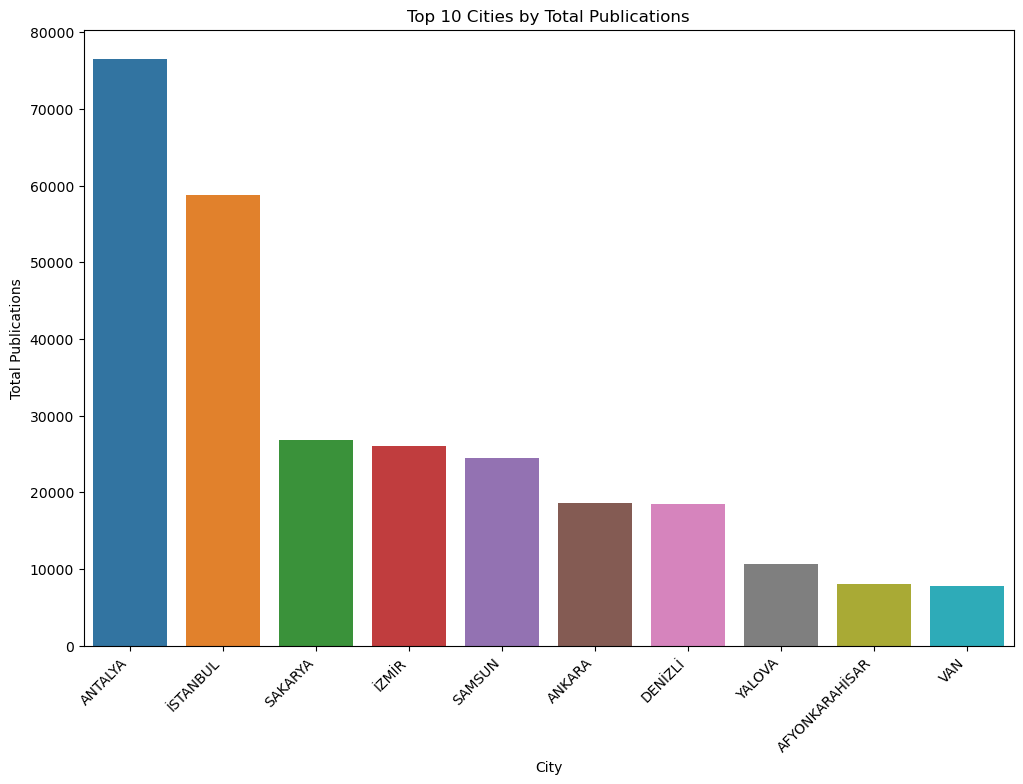

In [17]:
city_stats = data_cleaned.groupby('City').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values('Citations', ascending=False)

top_cities = city_stats.head(10)

metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Total Citations', 'Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Total Publications']


for metric, title in zip(metrics, titles):
    
    sorted_data = top_cities.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_data.index, y=sorted_data[metric])
    plt.title(f"Top 10 Cities by {title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(title)
    plt.xlabel("City")
    plt.show()


In [19]:
#efficiency

data_cleaned['Citations per Publication'] = data_cleaned['Citations'] / data_cleaned['Number of Publications']
top_efficiency_uni = data_cleaned.groupby('University')['Citations per Publication'].mean().sort_values(ascending=False)
print(top_efficiency_uni)

University
AFYONKARAHİSAR_SAĞLIK_BİLİMLERİ              44.866576
ÜSKÜDAR                                      36.986918
SABANCI                                      18.294055
ADANA_ALPARSLAN_TÜRKEŞ_BİLİM_VE_TEKNOLOJİ    17.700000
ADIYAMAN                                     14.250747
YÜKSEK_İHTİSAS                               13.847585
YEDİTEPE                                     13.476690
SAMSUN                                       12.144687
AĞRI_İBRAHİM_ÇEÇEN                           11.920276
ABDULLAH_GÜL                                 11.681748
PAMUKKALE                                    11.501006
ACIBADEM_MEHMET_ALİ_AYDINLAR                 11.039664
YAŞAR                                        10.794932
VAN_YÜZÜNCÜ_YIL                              10.702683
SAKARYA                                      10.627471
YOZGAT_BOZOK                                 10.619399
AFYON_KOCATEPE                               10.519399
AKDENİZ                                      10.080827

/var/folders/c1/wz4767gs3gl7jgq5zqvt3xrh0000gn/T/ipykernel_3780/2395660296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Citations per Publication'] = data_cleaned['Citations'] / data_cleaned['Number of Publications']


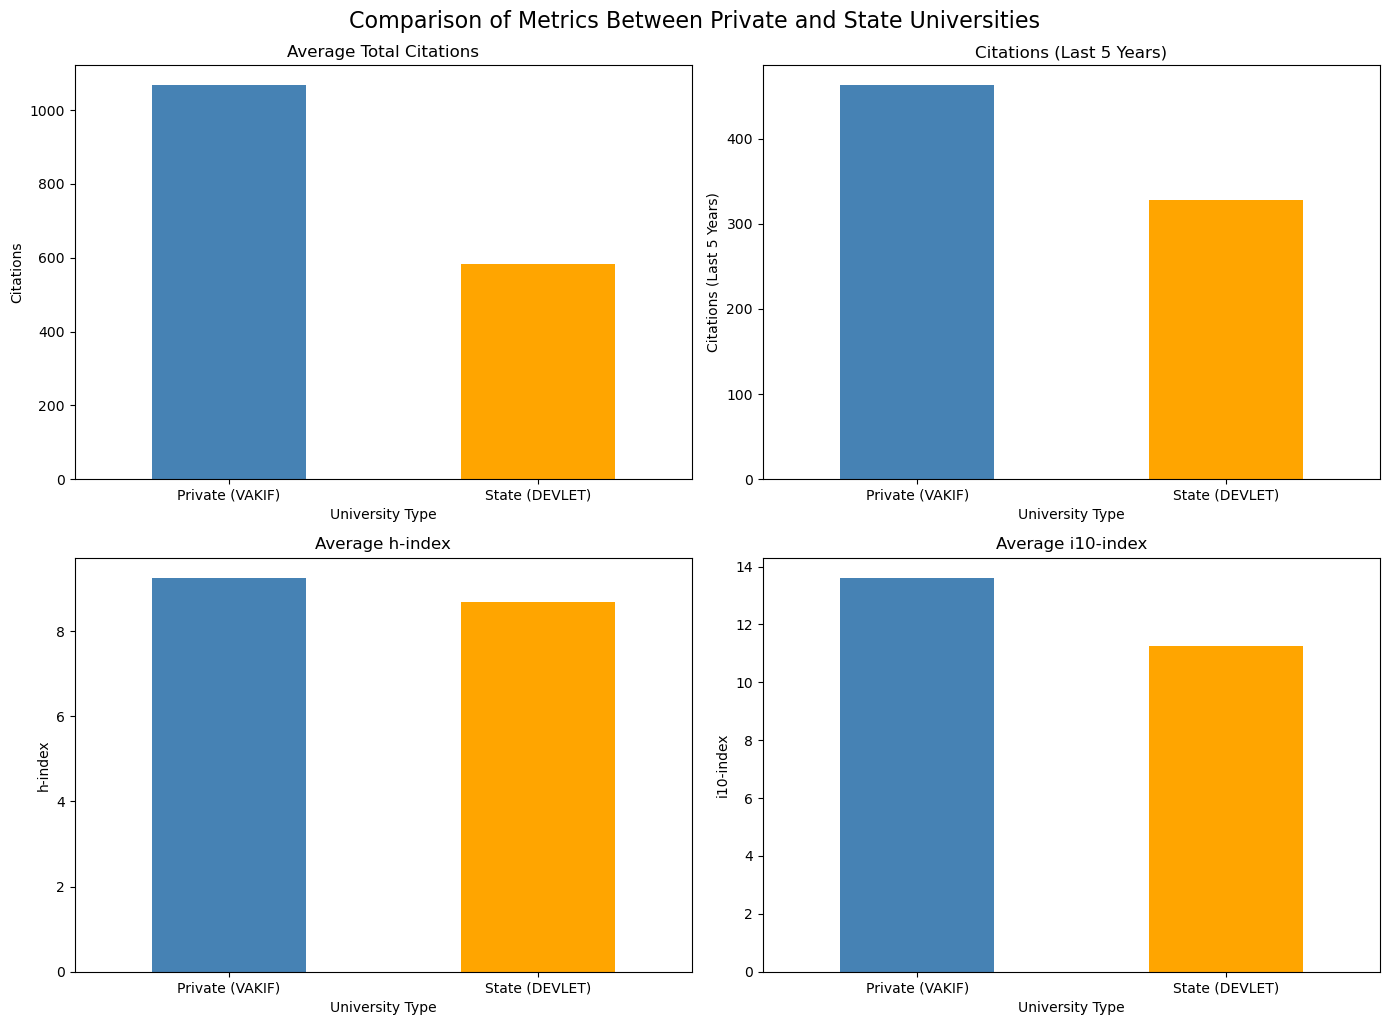

In [24]:
#comparison by type

type_comparison = data_cleaned.groupby('Type').agg({
    'Citations': 'mean',
    'Citations (Last 5 Years)': 'mean',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'mean'
}).sort_values(by='Citations', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index']
titles = ['Average Total Citations', 'Citations (Last 5 Years)', 'Average h-index', 'Average i10-index']

for ax, metric, title in zip(axes.flat, metrics, titles):
    type_comparison[metric].plot(kind='bar', ax=ax, color=['steelblue', 'orange'])
    ax.set_title(title)
    ax.set_ylabel(metric)
    ax.set_xlabel('University Type')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Private (VAKIF)', 'State (DEVLET)'], rotation=0)

fig.tight_layout()
plt.suptitle('Comparison of Metrics Between Private and State Universities', y=1.02, fontsize=16)
plt.show()


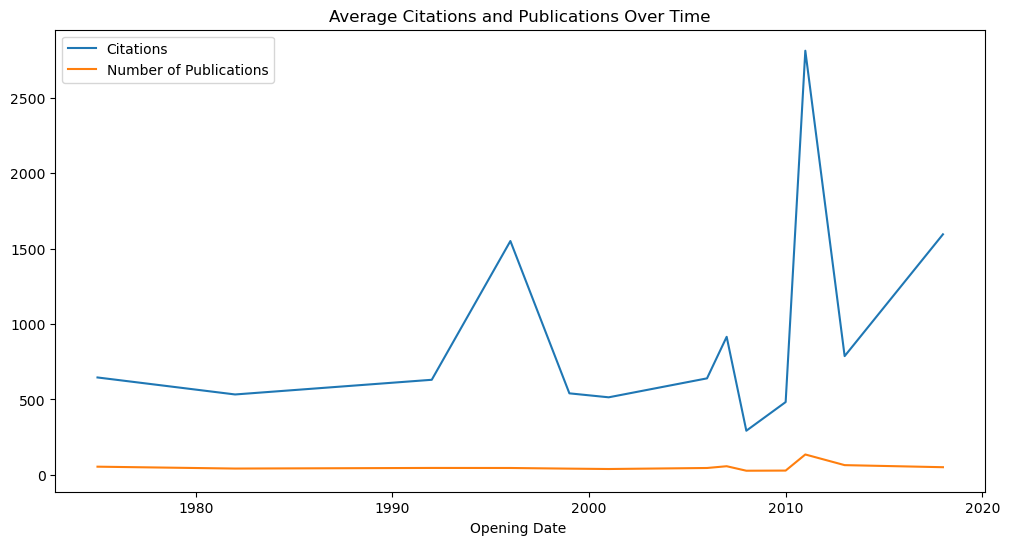

In [28]:
trend_data = data_cleaned.groupby('Opening Date ').agg({
    'Citations': 'mean',
    'Number of Publications': 'mean'
})
trend_data.plot(figsize=(12, 6), title="Average Citations and Publications Over Time")
plt.show()


In [30]:
top_efficiency_author = data_cleaned.groupby('Name')['Citations per Publication'].mean().sort_values(ascending=False)
print(top_efficiency_author)

Name
YAŞAR DOĞRUSÖZ          367.000000
Nurper Ulkuer           362.230769
Marco Chiappetta        343.000000
Hamza Al                326.000000
Güçlü Şekercioğlu       293.054054
                           ...    
Sinem Bozatlı Kartal      0.062500
Ender YETİM               0.062500
Ayla Akdoğan              0.058824
aydın yeşilyurt           0.055556
Ünal Tüysüz               0.052632
Name: Citations per Publication, Length: 6942, dtype: float64
